<a href="https://colab.research.google.com/github/AtilioFPedroni/Pc__Gillespie/blob/main/PC_Gelispe_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def processe_contato(g, infecao_inicial, beta, gamma, tf):

    n_infectados =  set(infecao_inicial)
    historico = [list(n_infectados)]
    t = [0]
    tc = 0

    while tc < tf and n_infectados:
        transicao = []
        probabilidade_total = 0

        for node in g.nodes():
            if node in n_infectados:
                taxa = gamma
                transicao.append(('infectar', (node), taxa))
                probabilidade_total = (gamma*n_infectados)/(beta*n_infectados + gamma*n_infectados)

            else:
                for neighbor in g.neighbors(node):
                    if neighbor in n_infectados:
                        taxa = beta* g.degree(node)
                        transicao.append(('infectar', (node), taxa))
                        probabilidade_total = (beta*n_infectados)/(beta*n_infectados + gamma*n_infectados)

        if probabilidade_total ==0:
            break

        u = random.random()
        dt = -np.log(1-u)/(beta*n_infectados + gamma*n_infectados)
        tc += dt
        t.append(tc)

        for trasition, taxa in transicao:
            probabilidade_trasicao = taxa/ probabilidade_total
            if u < probabilidade_trasicao:
                tipo_evento, node = trasition
                if tipo_evento == 'infectar':
                    n_infectados.add(node)
                elif tipo_evento == 'recuperar':
                    n_infectados.remove(node)

                break
        historico.append(list(n_infectados))
    return historico, t

def simulacao(n, m, betas, gamma, tm, ni=1):
    results = {}
    for beta in betas:
        g = nx.barabasi_albert_graph(n, m)
        infecao_inicial = random.sample(range(n), ni)
        historico, t = processe_contato(g, infecao_inicial, beta, gamma, tm)
        results[beta] = (historico, t)
    return results

######################################  Parâmetros ##############################

n = 100
m = 5
betas = [0.1, 1, 3.29, 5, 1.5]
gamma = 1
tm = 100
ni = 1

results = simulacao(n, m, betas, gamma, tm, ni)

plt.figure(figsize=(10,6))
for beta, (historico, t) in results.items():
    plt.plot(t, [len(x) for x in historico], maker='o', linestyle='-', label=f'β = {beta}')

plt.xlabel("Tempo")
plt.ylabel("Número de Nós Infectados")
plt.xscale('log')
plt.yscale('log')
plt.title("Evolução da Epidemia (vários β)")
plt.grid(True)
plt.legend()
plt.show()

TypeError: unsupported operand type(s) for *: 'float' and 'set'

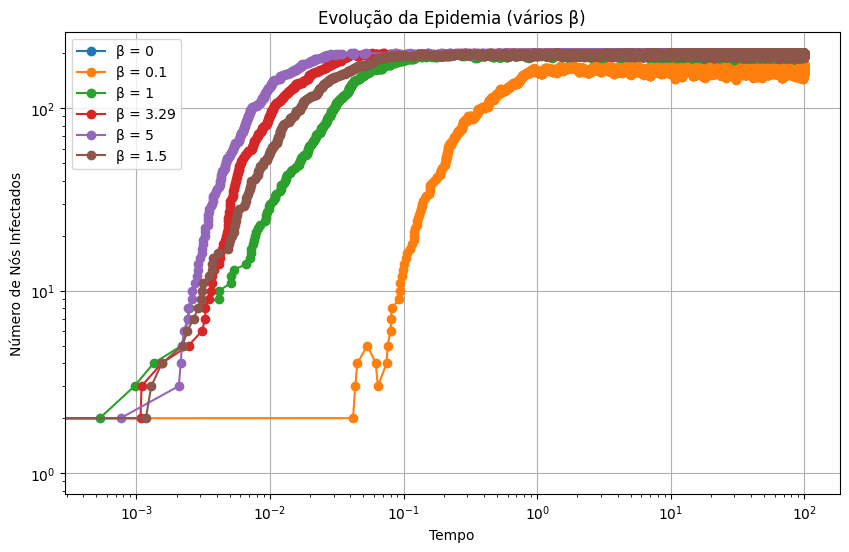

In [ ]:
def processe_contato(g, infecao_inicial, beta, gamma, tf=1000):

    n_infectados = set(infecao_inicial)
    historico = [list(n_infectados)]
    t = [0]
    tc = 0

    while tc < tf and len(n_infectados) > 0:
        transicao = []
        taxas = []

        for node in g.nodes():
            if node in n_infectados:
                taxa = gamma
                transicao.append(('recuperar', node))
                taxas.append(taxa)
            else:
                for neighbor in g.neighbors(node):
                    if neighbor in n_infectados:
                        taxa = beta * g.degree(node)
                        transicao.append(('infectar', node))
                        taxas.append(taxa)

        if not taxas:
            break


        probabilidade_total = sum(taxas)
        probabilidade_acumulada = np.cumsum(taxas) / probabilidade_total

        u = random.random()
        dt = -np.log(1 - u) / probabilidade_total
        tc += dt
        t.append(tc)


        indice_evento = np.searchsorted(probabilidade_acumulada, u)
        tipo_evento, node = transicao[indice_evento]

        if tipo_evento == 'infectar':
            if node not in n_infectados:
                n_infectados.add(node)
        elif tipo_evento == 'recuperar':
            n_infectados.remove(node)

        historico.append(list(n_infectados))
    return historico, t

def simulacao(n, m, betas, gamma, tm, ni=1):
    results = {}
    for beta in betas:
        g = nx.barabasi_albert_graph(n, m)
        infecao_inicial = random.sample(range(n), ni)
        historico, t = processe_contato(g, infecao_inicial, beta, gamma, tm)
        results[beta] = (historico, t)
    return results

######################################  Parâmetro ##############################

n = 200
m = 5
betas = [0, 0.1, 1, 3.29, 5, 1.5]
gamma = 1
tm = 100
ni = 1

results = simulacao(n, m, betas, gamma, tm, ni)

plt.figure(figsize=(10, 6))
for beta, (historico, t) in results.items():
    plt.plot(t, [len(x) for x in historico], marker='o', linestyle='-', label=f'β = {beta}')

plt.xlabel("Tempo")
plt.ylabel("Número de Nós Infectados")
plt.xscale('log')
plt.yscale('log')
plt.title("Evolução da Epidemia (vários β)")
plt.grid(True)
plt.legend()
plt.show()

[[10],
 [25, 10],
 [25, 10, 5],
 [25, 10, 12, 5],
 [68, 5, 10, 12, 25],
 [68, 5, 8, 10, 12, 25],
 [34, 68, 5, 8, 10, 12, 25],
 [34, 68, 5, 8, 10, 12, 22, 25],
 [34, 68, 5, 8, 9, 10, 12, 22, 25],
 [34, 68, 5, 7, 8, 9, 10, 12, 22, 25],
 [34, 3, 68, 5, 7, 8, 9, 10, 12, 22, 25],
 [34, 3, 68, 5, 7, 8, 9, 10, 12, 22, 25, 90],
 [34, 3, 68, 5, 35, 7, 8, 9, 10, 12, 22, 25, 90],
 [0, 34, 3, 68, 5, 35, 7, 8, 9, 10, 12, 22, 25, 90],
 [0, 34, 3, 68, 5, 35, 7, 8, 9, 10, 12, 18, 22, 25, 90],
 [0, 34, 3, 68, 5, 35, 7, 8, 9, 10, 100, 12, 18, 22, 25, 90],
 [0, 34, 3, 68, 5, 35, 7, 8, 9, 10, 100, 12, 185, 18, 22, 25, 90],
 [0, 34, 3, 68, 5, 35, 7, 8, 9, 10, 100, 12, 36, 185, 18, 22, 25, 90],
 [0, 3, 5, 7, 8, 9, 10, 12, 13, 18, 22, 25, 34, 35, 36, 185, 68, 90, 100],
 [0, 3, 5, 7, 8, 9, 10, 12, 13, 18, 22, 25, 34, 35, 36, 185, 68, 84, 90, 100],
 [0,
  3,
  5,
  7,
  8,
  9,
  10,
  12,
  13,
  18,
  22,
  25,
  34,
  35,
  36,
  47,
  185,
  68,
  84,
  90,
  100],
 [0,
  3,
  5,
  7,
  8,
  9,
  10,
  11,